### In this project I used Credit Card dataset from kaggle for clustering
#### data link: https://www.kaggle.com/arjunbhasin2013/ccdata

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Get The Data

In [3]:
data=pd.read_csv("data.csv")

### Explore the data

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Clean data

In [4]:
#refill null values
min_pay=data["MINIMUM_PAYMENTS"].median()
data["MINIMUM_PAYMENTS"].fillna(min_pay, inplace=True)

data.dropna(subset=["CREDIT_LIMIT"] , inplace=True)

In [5]:
#drop CUST_ID column
data.drop("CUST_ID", inplace=True, axis=1)

### Data visualization

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

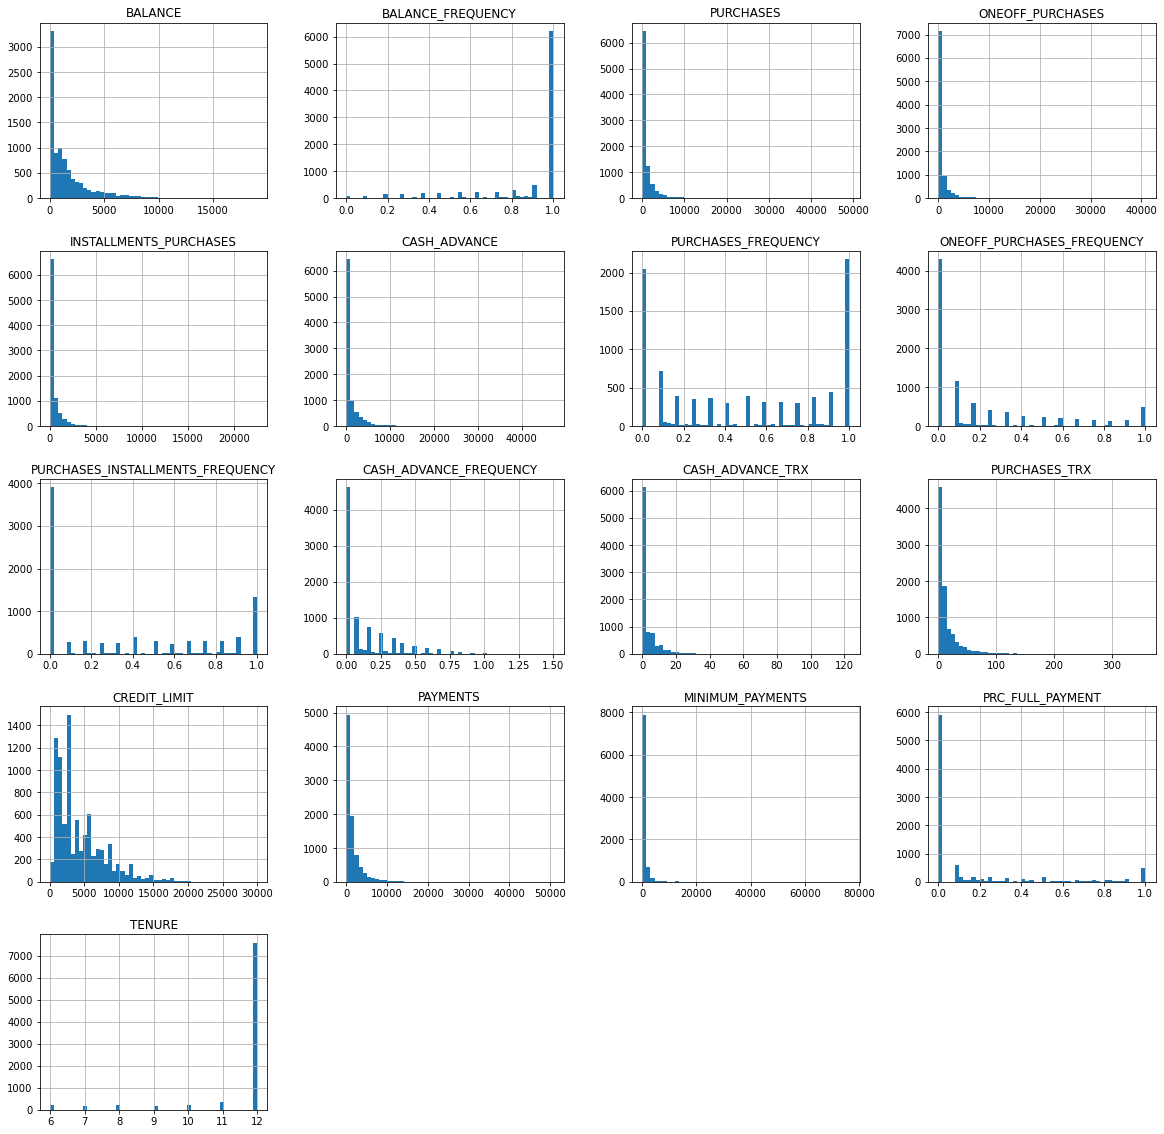

In [9]:
data.hist(bins=50,figsize=(20,20))

<AxesSubplot:>

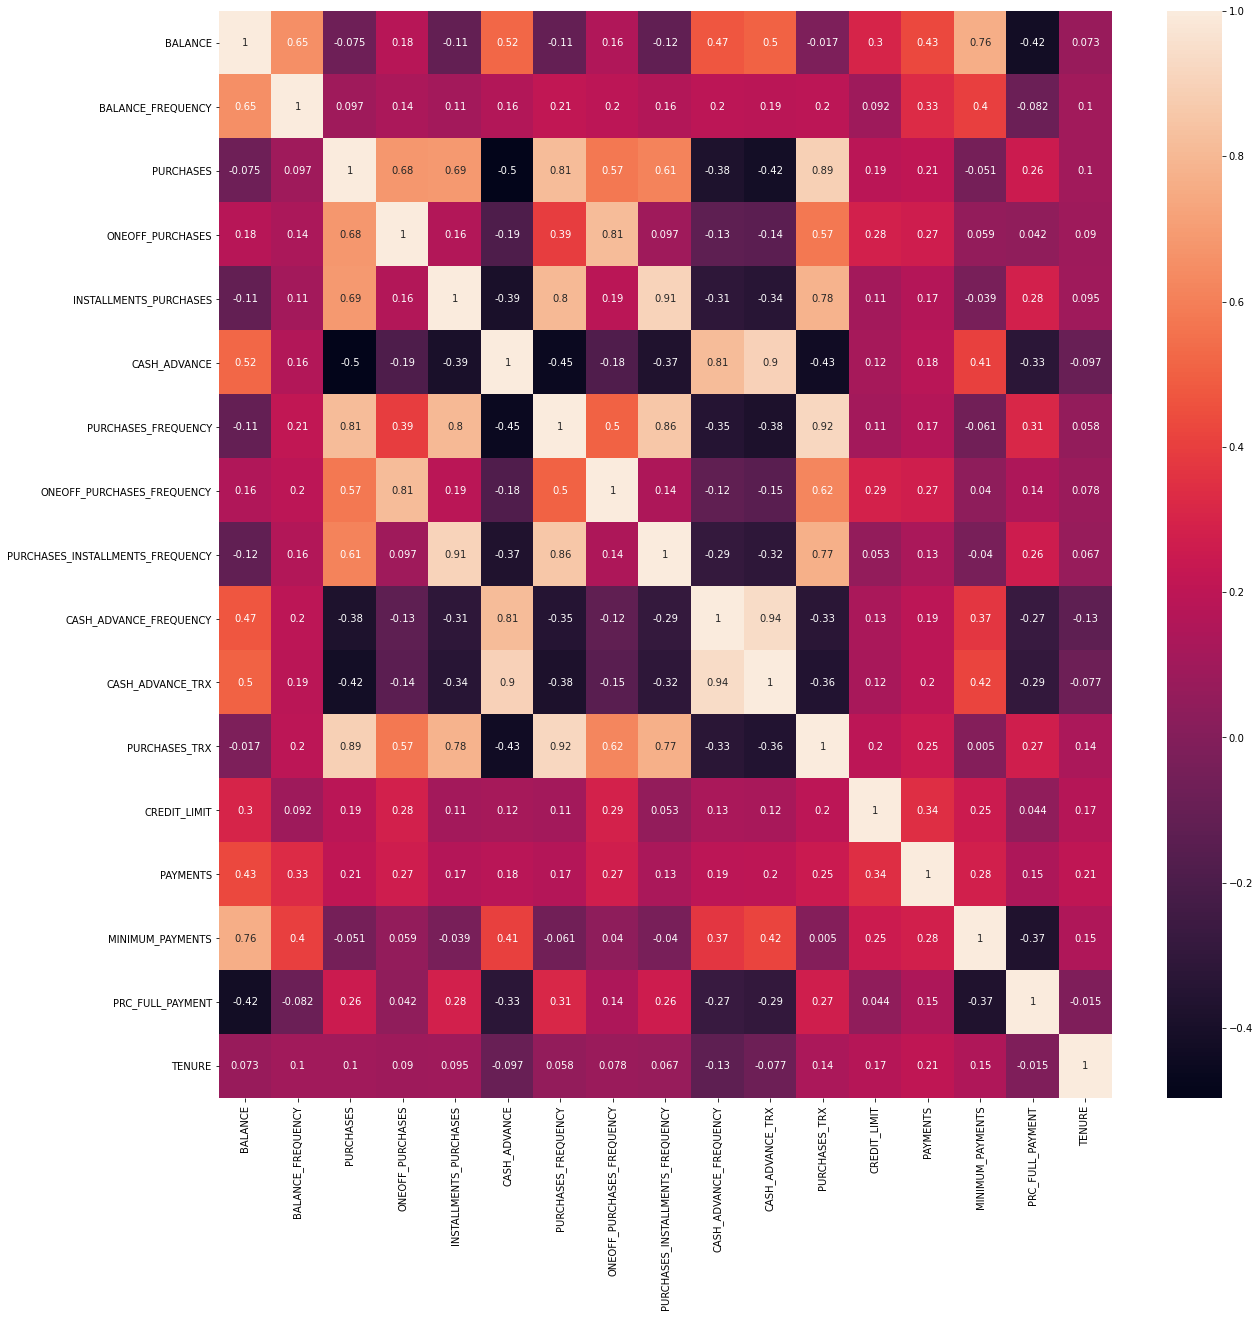

In [15]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

### Square root transformation to deal with skew data

In [17]:
sqrt_data=data.copy()
for col in sqrt_data.columns:
    sqrt_data[col]= np.sqrt(sqrt_data[col]+1)
sqrt_data   

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.473079,1.348400,9.818350,1.000000,9.818350,1.000000,1.080124,1.000000,1.040833,1.000000,1.000000,1.732051,31.638584,14.240860,11.853682,1.000000,3.605551
1,56.599182,1.381699,1.000000,1.000000,1.000000,80.274189,1.000000,1.000000,1.000000,1.118034,2.236068,1.000000,83.671979,64.062724,32.761871,1.105541,3.605551
2,49.961474,1.414214,27.823911,27.823911,1.000000,1.000000,1.414214,1.414214,1.000000,1.000000,1.000000,3.605551,86.608314,24.961305,25.065610,1.000000,3.605551
3,40.837122,1.279204,38.729833,38.729833,1.000000,14.380126,1.040833,1.040833,1.000000,1.040833,1.414214,1.414214,86.608314,1.000000,17.701524,1.000000,3.605551
4,28.613185,1.414214,4.123106,4.123106,1.000000,1.000000,1.040833,1.040833,1.000000,1.000000,1.000000,1.414214,34.655447,26.064051,15.677731,1.000000,3.605551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.430793,1.414214,17.091518,1.000000,17.091518,1.000000,1.414214,1.000000,1.354006,1.000000,1.000000,2.645751,31.638584,18.071925,7.063028,1.224745,2.645751
8946,4.492573,1.414214,17.349352,1.000000,17.349352,1.000000,1.414214,1.000000,1.354006,1.000000,1.000000,2.645751,31.638584,16.639150,17.701524,1.000000,2.645751
8947,4.939501,1.354006,12.058192,1.000000,12.058192,1.000000,1.354006,1.000000,1.290995,1.000000,1.000000,2.449490,31.638584,9.070324,9.133366,1.118034,2.645751
8948,3.802310,1.354006,1.000000,1.000000,1.000000,6.128522,1.000000,1.000000,1.000000,1.080124,1.732051,1.000000,22.383029,7.317784,7.533633,1.118034,2.645751


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

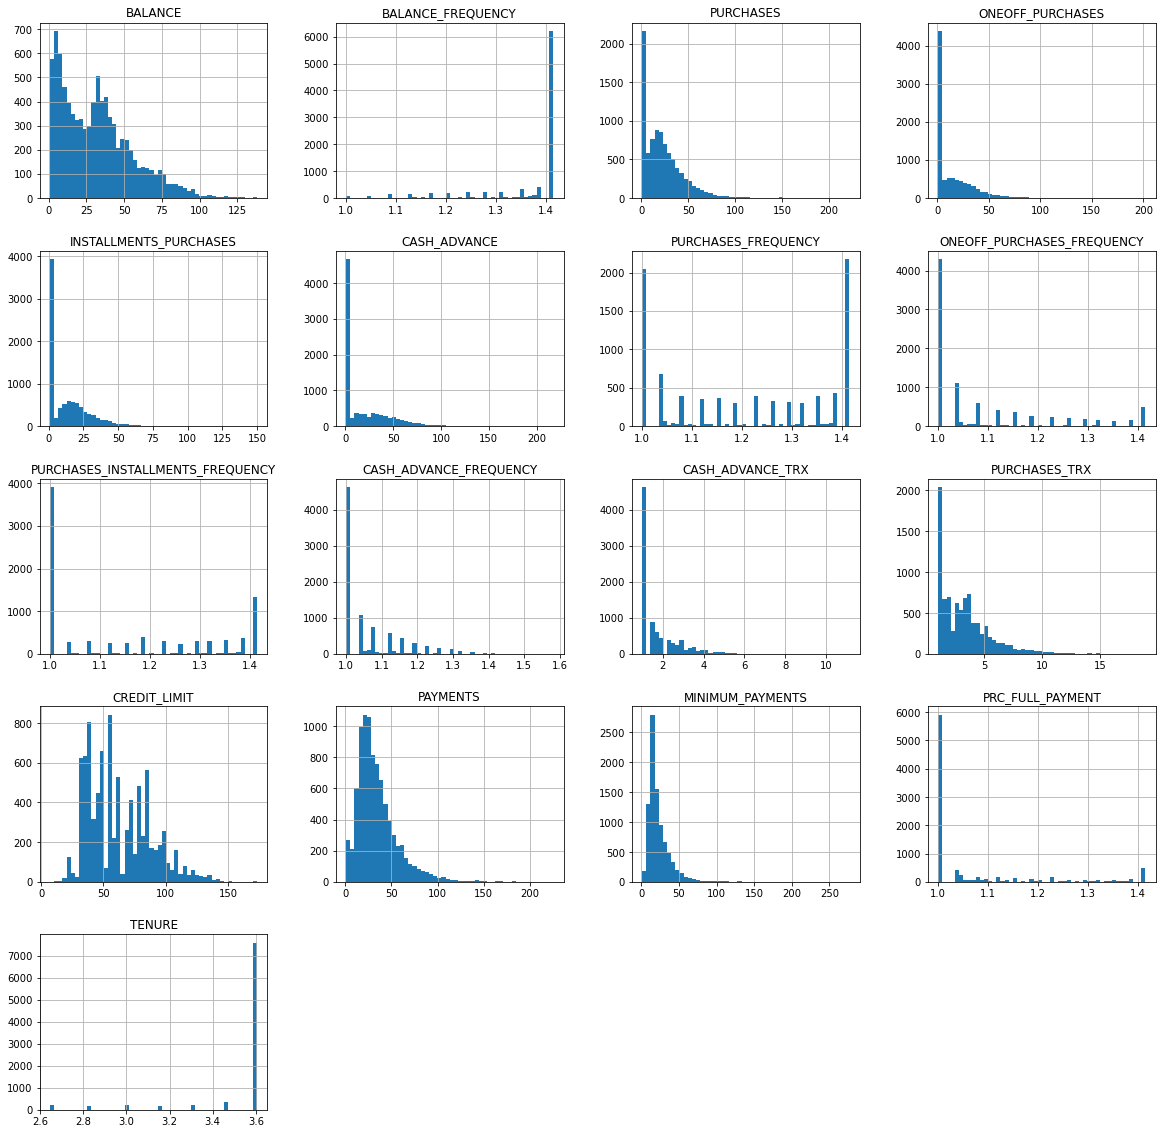

In [18]:
sqrt_data.hist(bins=50,figsize=(20,20))

### KMean Clustering

In [8]:
! pip install kneed

In [19]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### 1- calculate the inertia for different number of clusters

In [20]:
inertias=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i, random_state=23,init='k-means++')
    kmean.fit(sqrt_data)
    inertias.append(kmean.inertia_)

Text(0, 0.5, 'Inertias')

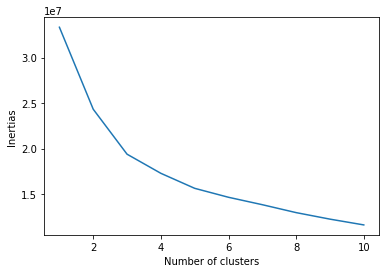

In [21]:
plt.plot(range(1,11), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertias")

#### 2- Select the number of clusters by using knee locator

In [22]:
n_clusters=np.arange(1,11)
inertias_arr=np.array(inertias)
elbow=KneeLocator(n_clusters,inertias_arr,S=1.0, curve='convex', direction='decreasing')
data_n_clusters=elbow.knee

In [23]:
data_n_clusters

3

#### Train the model

In [24]:
kmean=KMeans(n_clusters=data_n_clusters, random_state=23,init='k-means++')
data_pred=kmean.fit_predict(sqrt_data)

### PCA for data visualization

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

data_2D=pca.fit_transform(sqrt_data)
data_2D

array([[-52.51918593,   4.12434817],
       [ 44.64797341, -62.183643  ],
       [ 13.47607473,   8.03976775],
       ...,
       [-55.24865705,   6.4944033 ],
       [-64.68217814,  -5.38019646],
       [-30.40319353,  16.5175332 ]])

In [26]:
# convert to dataframe
data_2D=pd.DataFrame(data=data_2D, columns=['X','Y'])

# add new column conatains the id of cluster 
data_2D["clus_id"]=data_pred

In [27]:
data_2D

,X,Y,clus_id
0,-52.519186,4.124348,0
1,44.647973,-62.183643,1
2,13.476075,8.039768,0
3,7.147744,12.411667,0
4,-36.806686,-6.968843,0
...,...,...,...
8944,-49.096415,11.690733,0
8945,-47.554343,10.128914,0
8946,-55.248657,6.494403,0
8947,-64.682178,-5.380196,0


<AxesSubplot:xlabel='X', ylabel='Y'>

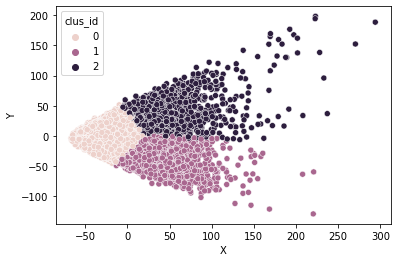

In [28]:
sns.scatterplot(data=data_2D, x='X', y='Y', hue="clus_id")

#### Note : I tried log transformation too, but i found that sqrt transformation is better than log transformation